In [2]:
# !pip install konlpy
# !pip install pyLDAvis

In [3]:
import os
import re
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import joblib
import pyLDAvis
from konlpy.tag import Okt
import pyLDAvis.gensim_models as gensimivis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.font_manager as fm

In [4]:
# Warning 무시
warnings.filterwarnings('ignore', category=UserWarning)

# Seaborn 테마 설정
sns.set_theme(style='whitegrid')

# 한글 폰트 사용
font_path = "C:\Windows\Fonts\Hancom Gothic Bold.ttf"  # 경로 확인 후 변경 필요
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

<>:8: DeprecationWarning: invalid escape sequence '\W'
<>:8: DeprecationWarning: invalid escape sequence '\W'
C:\Users\mir96\AppData\Local\Temp\ipykernel_26040\3488016036.py:8: DeprecationWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\Hancom Gothic Bold.ttf"  # 경로 확인 후 변경 필요


# 데이터 로드
- 공홈 데이터부터
- 디시는 글쎄 너무 많아서 모르겠음

In [5]:
df = pd.read_csv("../data/dnf_homepage_content.csv").drop(columns = 'Unnamed: 0')
df.head()

,time,num,category,nickname,title,content
0,2025-04-09,2895383,수다,타쿠쟝,"['[공통]', '★★븜하', '커뮤니티', '오픈톡방', '인원', '모집', '...","['★★븜하', '커뮤니티', '오픈톡방', '인원', '모집', '[수다', '/..."
1,2025-04-09,2924227,질문,성기사주세요,"['[공통]', '던담', '딜', '관련질문', '(1)']","['새로고침', '누르면', '딜이', '낮아졌다', '높아졌다하는데', '왜이런건..."
2,2025-04-09,2924226,수다,이올라,"['[공통]', '갱신되는', '카드']","['나벨레이드', '갱신', '카드', '0']"
3,2025-04-09,2924225,질문,리홍뀨,"['[공통]', '무한화서', '내일', '끝나면', '에픽무기도', '못까는건가요...","['분홍색', '큰거', '하나만', '먹으면', '되는데내일', '끝나면', '없..."
4,2025-04-09,2924224,질문,Fiendish강유,"['[공통]', '패스', '및', '패키지', '관련', '질문', '(5)']","['안녕하세요복귀', '30일차', '뉴비입니다.현재', '프로스트', '패키지',..."


In [6]:
# 나중에 햇깔릴지도 모르니까 '공홈'이라고 카테고리 입력
df['source'] = 'homepage'
df.head()

,time,num,category,nickname,title,content,source
0,2025-04-09,2895383,수다,타쿠쟝,"['[공통]', '★★븜하', '커뮤니티', '오픈톡방', '인원', '모집', '...","['★★븜하', '커뮤니티', '오픈톡방', '인원', '모집', '[수다', '/...",homepage
1,2025-04-09,2924227,질문,성기사주세요,"['[공통]', '던담', '딜', '관련질문', '(1)']","['새로고침', '누르면', '딜이', '낮아졌다', '높아졌다하는데', '왜이런건...",homepage
2,2025-04-09,2924226,수다,이올라,"['[공통]', '갱신되는', '카드']","['나벨레이드', '갱신', '카드', '0']",homepage
3,2025-04-09,2924225,질문,리홍뀨,"['[공통]', '무한화서', '내일', '끝나면', '에픽무기도', '못까는건가요...","['분홍색', '큰거', '하나만', '먹으면', '되는데내일', '끝나면', '없...",homepage
4,2025-04-09,2924224,질문,Fiendish강유,"['[공통]', '패스', '및', '패키지', '관련', '질문', '(5)']","['안녕하세요복귀', '30일차', '뉴비입니다.현재', '프로스트', '패키지',...",homepage


In [ ]:
# # 이제 okt를 한번써보자
# okt = Okt()

# def preprocess_text(text) :

#   # 비어있으면 빈칸으로 설정
#   if pd.isna(text) :
#     return ""
  
#   # 정규화를 통한 전처리
#   text = str(text)
#   text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", text)

#   # okt 토큰화
#   if text.strip():
#     tokens = okt.nouns(text)
#     return " ".join(tokens)
#   return ""

# # 데이터 프레임에 적용
# df['cleaed_comtent'] = df['content'].apply(preprocess_text)

KeyboardInterrupt: 

In [10]:
df.head()

,Unnamed: 0,time,num,category,nickname,title,content,source,cleaed_comtent,topic
0,0,2025-04-09,2895383,수다,타쿠쟝,"['[공통]', '★★븜하', '커뮤니티', '오픈톡방', '인원', '모집', '...","['★★븜하', '커뮤니티', '오픈톡방', '인원', '모집', '[수다', '/...",homepage,븜하 커뮤니티 오픈 톡방 인원 모집 수다 정보 공유 중천 나벨 레이드 구인 방 븜하...,1
1,1,2025-04-09,2924227,질문,성기사주세요,"['[공통]', '던담', '딜', '관련질문', '(1)']","['새로고침', '누르면', '딜이', '낮아졌다', '높아졌다하는데', '왜이런건...",homepage,새로고침 딜 왜 건가,0
2,2,2025-04-09,2924226,수다,이올라,"['[공통]', '갱신되는', '카드']","['나벨레이드', '갱신', '카드', '0']",homepage,나벨 레이드 갱신 카드,1
3,3,2025-04-09,2924225,질문,리홍뀨,"['[공통]', '무한화서', '내일', '끝나면', '에픽무기도', '못까는건가요...","['분홍색', '큰거', '하나만', '먹으면', '되는데내일', '끝나면', '없...",homepage,분홍색 하나 내일 가요,0
4,4,2025-04-09,2924224,질문,Fiendish강유,"['[공통]', '패스', '및', '패키지', '관련', '질문', '(5)']","['안녕하세요복귀', '30일차', '뉴비입니다.현재', '프로스트', '패키지',...",homepage,복귀 일차 뉴비 현재 프로스트 패키지 개 로얄 패스 구매 사용 본캐 은 프로스트 칭...,2


In [15]:
# df = df.drop_duplicates(subset = 'content')
# df.head()
# df.to_csv('comtent_okt.csv')

df = pd.read_csv('comtent_okt.csv').drop_duplicates(subset='title').dropna()
df.head()

,Unnamed: 0,time,num,category,nickname,title,content,source,cleaed_comtent,topic
0,0,2025-04-09,2895383,수다,타쿠쟝,"['[공통]', '★★븜하', '커뮤니티', '오픈톡방', '인원', '모집', '...","['★★븜하', '커뮤니티', '오픈톡방', '인원', '모집', '[수다', '/...",homepage,븜하 커뮤니티 오픈 톡방 인원 모집 수다 정보 공유 중천 나벨 레이드 구인 방 븜하...,1
1,1,2025-04-09,2924227,질문,성기사주세요,"['[공통]', '던담', '딜', '관련질문', '(1)']","['새로고침', '누르면', '딜이', '낮아졌다', '높아졌다하는데', '왜이런건...",homepage,새로고침 딜 왜 건가,0
2,2,2025-04-09,2924226,수다,이올라,"['[공통]', '갱신되는', '카드']","['나벨레이드', '갱신', '카드', '0']",homepage,나벨 레이드 갱신 카드,1
3,3,2025-04-09,2924225,질문,리홍뀨,"['[공통]', '무한화서', '내일', '끝나면', '에픽무기도', '못까는건가요...","['분홍색', '큰거', '하나만', '먹으면', '되는데내일', '끝나면', '없...",homepage,분홍색 하나 내일 가요,0
4,4,2025-04-09,2924224,질문,Fiendish강유,"['[공통]', '패스', '및', '패키지', '관련', '질문', '(5)']","['안녕하세요복귀', '30일차', '뉴비입니다.현재', '프로스트', '패키지',...",homepage,복귀 일차 뉴비 현재 프로스트 패키지 개 로얄 패스 구매 사용 본캐 은 프로스트 칭...,2


In [16]:
# CountVectorizer 적용
vectorizer = CountVectorizer(
  max_df = 0.95,
  min_df = 2,
  max_features = 1000,
  stop_words=None
)
dtm = vectorizer.fit_transform(df['cleaed_comtent'])

In [17]:
# LDA 모델 적용 (토픽 개수 3개)
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [18]:
lda.components_

array([[7.28169005e+00, 7.56541636e+01, 1.42342526e+02, ...,
        1.85976922e+01, 4.56356518e+01, 1.00010035e-01],
       [7.64014768e+01, 7.88552160e+00, 5.29466688e+01, ...,
        1.00008330e-01, 1.00014185e-01, 1.00009470e-01],
       [3.40833320e+02, 3.89400013e+00, 6.84425371e+01, ...,
        1.06468761e+02, 1.00015301e-01, 1.00012260e-01],
       ...,
       [1.00005344e-01, 2.70618235e+01, 5.15023811e+01, ...,
        1.00004627e-01, 1.00008285e-01, 2.94352551e+00],
       [6.13925820e+01, 3.39484865e+01, 1.33686751e+02, ...,
        6.98095887e+00, 2.11635292e+01, 1.85840286e+02],
       [1.00003967e-01, 1.00012417e-01, 1.33424171e+01, ...,
        1.00001346e-01, 1.00010305e-01, 1.00018087e-01]])

In [19]:
# 각 토픽별 주요 단어 출력
def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    top_indices = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_indices]
    print(f"Topic {topic_idx + 1}:")
    print(" ".join(top_words))
    print()

print_top_words(lda, vectorizer.get_feature_names_out(), 10)

Topic 1:
던전 캐릭 생각 명성 시즌 정도 레이드 게임 던파 유저

Topic 2:
쿠폰 던파 중천 뉴비 복귀 혹시 선배 모험 가요 시작

Topic 3:
아바타 칭호 종결 크리 구매 골드 오라 카드 패스 강화

Topic 4:
레벨 영웅 피로 일차 소모 홍옥 안개 인도 전설 사전예약

Topic 5:
태초 무기 에픽 캐릭 본캐 부캐 레거시 하나 종말 소울

Topic 6:
증폭 버퍼 장비 융합 딜러 강화 때문 뮤즈 버프력 사용

Topic 7:
세트 에픽 장비 태초 유니크 포인트 소울 황금향 무기 레전더

Topic 8:
패턴 파티 베누스 시간 보스 버프 경우 공격 입장 진각

Topic 9:
스킬 사용 추천 해장 데미지 쿨타임 공격 경우 옵션 세트

Topic 10:
버그 무슨 고치 중력 거마 고어 어퍼 영상 랭커 재련



In [20]:
# 문서별 토픽 분포
doc_topic_dist = lda.transform(dtm)
df['topic'] = doc_topic_dist.argmax(axis=1)

c:\Users\mir96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mir96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mir96\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


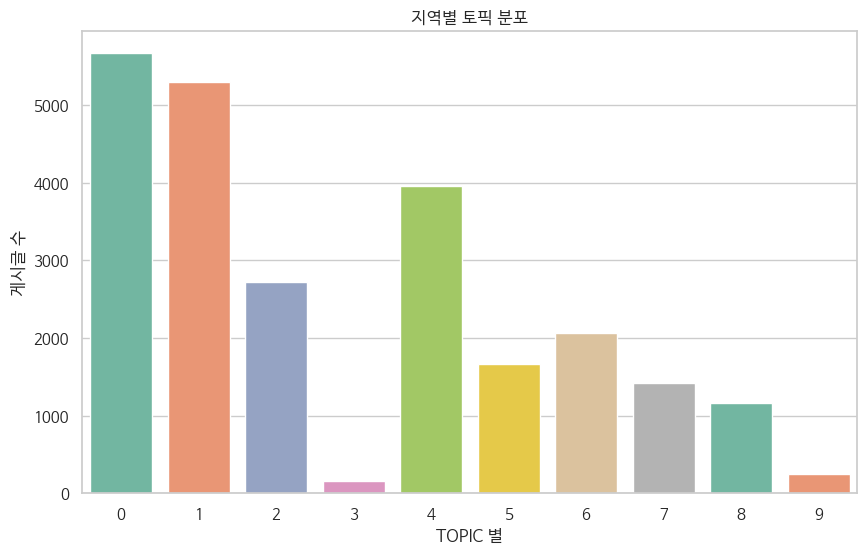

In [21]:
# 지역별 토픽 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x = 'topic', palette='Set2')
plt.title("지역별 토픽 분포")
plt.xlabel("TOPIC 별")
plt.ylabel("게시글 수")
plt.show()

In [22]:
# pyLDAvis 활성화
pyLDAvis.enable_notebook()

# 단어 목록 및 빈도 계산
vocab = vectorizer.get_feature_names_out()
term_frequency = np.asarray(dtm.sum(axis=0)).flatten()

# BrokenProcessPool 오류 방지를 위해 `joblib` 사용 안 함
joblib.parallel_backend('threading')

# LDA 시각화 실행
lda_visualization = pyLDAvis.prepare(
    topic_term_dists=lda.components_ / lda.components_.sum(axis=1)[:, None],
    doc_topic_dists=lda.transform(dtm),
    doc_lengths=[len(doc.split()) for doc in df['cleaed_comtent']],
    vocab=vocab,
    term_frequency=term_frequency
)

pyLDAvis.display(lda_visualization)